# Species Segmentation with Cluster Analysis

There are 4 features: sepal length, sepal width, petal length, and petal width.

We will group the data sets by shape of their sepal and shape of their petal.

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Loading the data

In [2]:
data = pd.read_csv('iris-dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Deviding the data by shape of their sepals and shape of their petals

In [3]:
sepals = data.drop(['petal_length', 'petal_width'], axis = 1)

In [4]:
petals = data.drop(['sepal_length', 'sepal_width'], axis = 1)

## Ploting the data

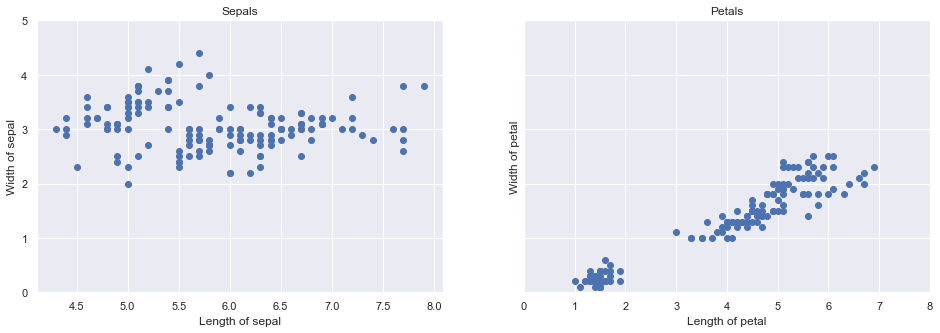

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(sepals['sepal_length'],sepals['sepal_width'])
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(petals['petal_length'],petals['petal_width'])
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## Clustering (unscaled data)

Separate the original data sets into 2 clusters.

In [6]:
# creating a variables which will contain the data for the clustering
x_s = sepals.copy()
x_p = petals.copy()

# creating a k-means objects with 2 clusters
kmeans_s = KMeans(2)
kmeans_p = KMeans(2)

# fitting the data
kmeans_s.fit(x_s)
kmeans_p.fit(x_p)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# creating a copy of data, so we can see the clusters next to the original data
clusters_s = sepals.copy()
clusters_p = petals.copy()

# predicting the clusters for each observation
clusters_s['cluster_pred']=kmeans_s.fit_predict(x_s)
clusters_p['cluster_pred']=kmeans_p.fit_predict(x_p)

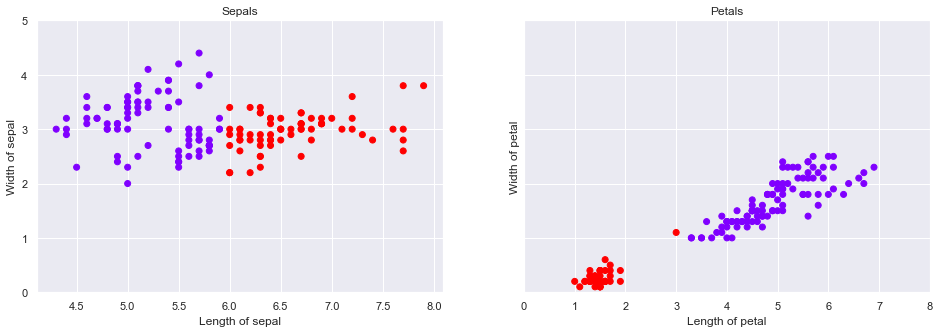

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_s['sepal_length'], clusters_s['sepal_width'], c= clusters_s['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(clusters_p['petal_length'], clusters_p['petal_width'], c= clusters_p['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## Standardizing the variables

Importing and using the <i> scale </i> function from sklearn to standardize the data. 

In [9]:
from sklearn import preprocessing

# scaling the data for better results
s_scaled = preprocessing.scale(sepals)
p_scaled = preprocessing.scale(petals)

## Clustering (scaled data)

In [10]:
# creating a k-means objects with 2 clusters
kmeans_s_scaled = KMeans(2)
kmeans_p_scaled = KMeans(2)

# fitting the data
kmeans_s_scaled.fit(s_scaled)
kmeans_p_scaled.fit(p_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# creating a copy of data, so we can see the clusters next to the original data
clusters_s_scaled = sepals.copy()
clusters_p_scaled = petals.copy()

# predicting the cluster for each observation
clusters_s_scaled['cluster_pred']=kmeans_s_scaled.fit_predict(s_scaled)
clusters_p_scaled['cluster_pred']=kmeans_p_scaled.fit_predict(p_scaled)

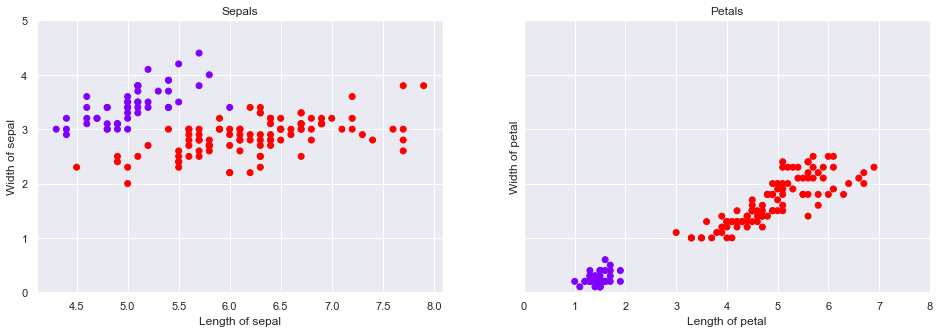

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_s_scaled['sepal_length'], clusters_s_scaled['sepal_width'], c= clusters_s_scaled['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(clusters_p_scaled['petal_length'], clusters_p_scaled['petal_width'], c= clusters_p_scaled['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## Take Advantage of the Elbow Method

### WCSS

In [13]:
wcss_s = []
wcss_p = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    
    kmeans.fit(s_scaled)
    wcss_iter = kmeans.inertia_
    wcss_s.append(wcss_iter)
    
    kmeans.fit(p_scaled)
    wcss_iter = kmeans.inertia_
    wcss_p.append(wcss_iter)
    
print ("WCSS for sepals:")
wcss_s

WCSS for sepals:


[300.0,
 168.39262198361087,
 103.78925176998135,
 79.76763093668842,
 61.70659834761936,
 52.13673381670594,
 44.34190014837431,
 36.25190752720021,
 30.51542336380469]

In [14]:
print ("WCSS for petals:")
wcss_p

WCSS for petals:


[300.0,
 54.145847013449895,
 18.046983891906272,
 12.307440251261845,
 9.192414757507372,
 7.215096212730807,
 6.030164763657966,
 5.151546796494884,
 4.414877020443289]

### The Elbow Method

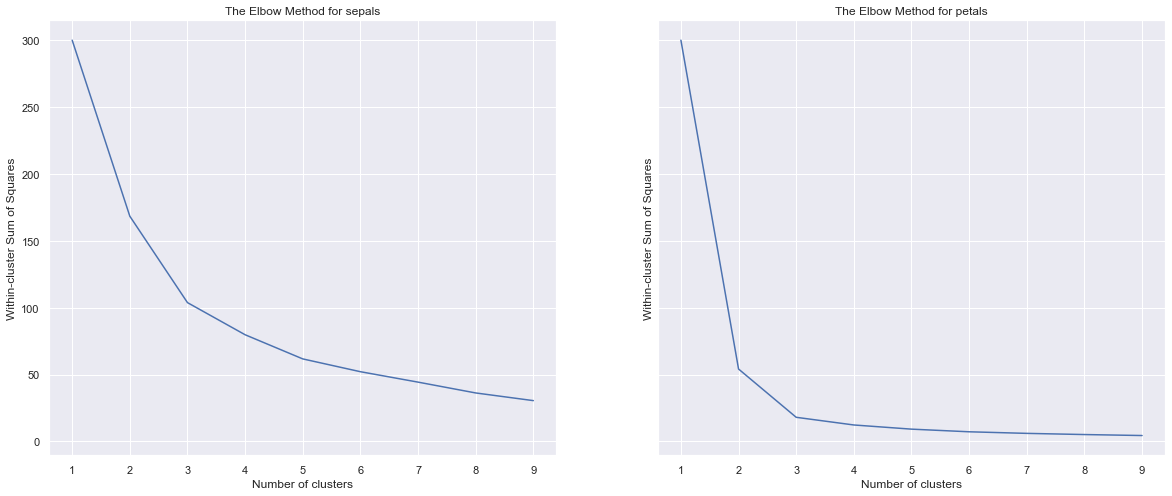

In [15]:
number_clusters = range(1,cl_num)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(20,8))
ax1.plot(number_clusters, wcss_s)
ax1.set_title('The Elbow Method for sepals')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Within-cluster Sum of Squares')

ax2.plot(number_clusters, wcss_p)
ax2.set_title('The Elbow Method for petals')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Within-cluster Sum of Squares')

plt.show()

Based on the Elbow Curve, we're ploting several graphs with the appropriate amounts of clusters
Appropriate number of cluster based on the Elbow Curves: 2, 3, 5 for sepals data; 2,3 for petals data

## 2 clusters - we've already done this earlier

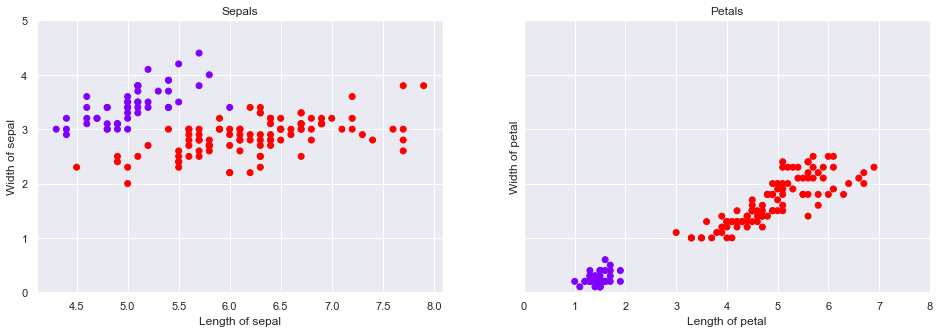

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_s_scaled['sepal_length'], clusters_s_scaled['sepal_width'], c= clusters_s_scaled['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(clusters_p_scaled['petal_length'], clusters_p_scaled['petal_width'], c= clusters_p_scaled['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## 3 Clusters - sepals and petals

In [17]:
# creating a k-means objects with 3 clusters
kmeans_3_s = KMeans(3)
kmeans_3_p = KMeans(3)


# fitting the data
kmeans_3_s.fit(s_scaled)
kmeans_3_p.fit(p_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# creating a copy of data, so we can see the clusters next to the original data
clusters_3_s = sepals.copy()
clusters_3_p = petals.copy()

# predicting the cluster for each observation
clusters_3_s['cluster_pred']=kmeans_3_s.fit_predict(s_scaled)
clusters_3_p['cluster_pred']=kmeans_3_p.fit_predict(p_scaled)

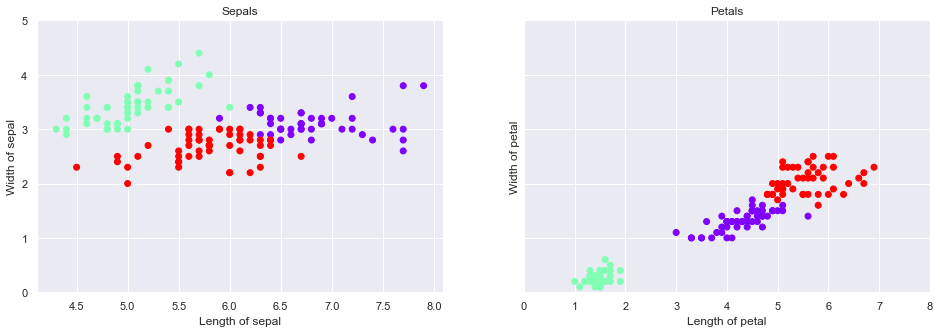

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_3_s['sepal_length'], clusters_3_s['sepal_width'], c= clusters_3_s['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(clusters_3_p['petal_length'], clusters_3_p['petal_width'], c= clusters_3_p['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## 5 Clusters - sepals

In [20]:
# creating a k-means objects with 3 clusters
kmeans_5_s = KMeans(5)

# fitting the data
kmeans_5_s.fit(s_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# creating a copy of data, so we can see the clusters next to the original data
clusters_5_s = sepals.copy()

# predicting the cluster for each observation
clusters_5_s['cluster_pred']=kmeans_5_s.fit_predict(s_scaled)

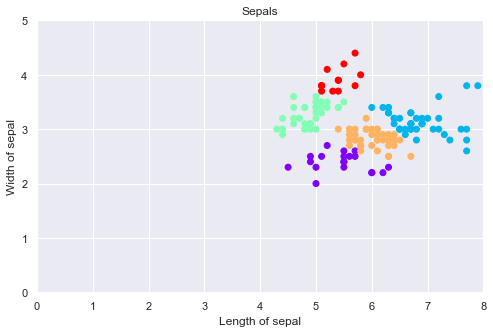

In [22]:
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize =(8,5))
ax1.scatter(clusters_5_s['sepal_length'], clusters_5_s['sepal_width'], c= clusters_5_s ['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

## Comparing the solutions to the original iris dataset

'Real data' is the data observed in the real world (biological data)

In [28]:
real_data = pd.read_csv('iris-with-answers.csv')

In [29]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### There are only 3 species of Iris, that's the original (truthful) iris dataset.

In [30]:
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [31]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots (which we will use for comparison)

#### 'Real data' - 3 clusters

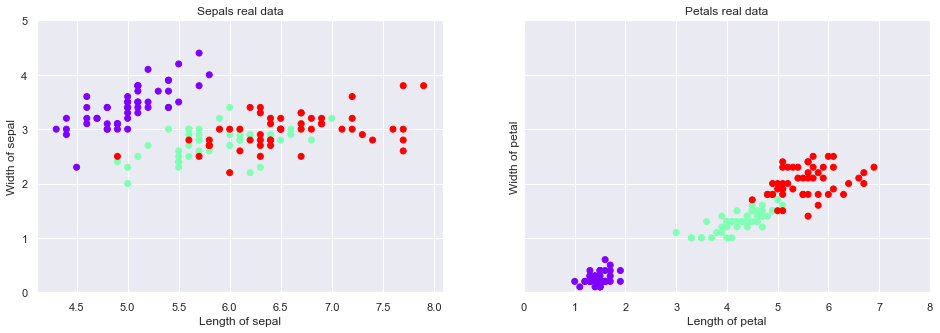

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')
ax1.set_title('Sepals real data')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
ax2.set_title('Petals real data')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

#### Our clustering solution data

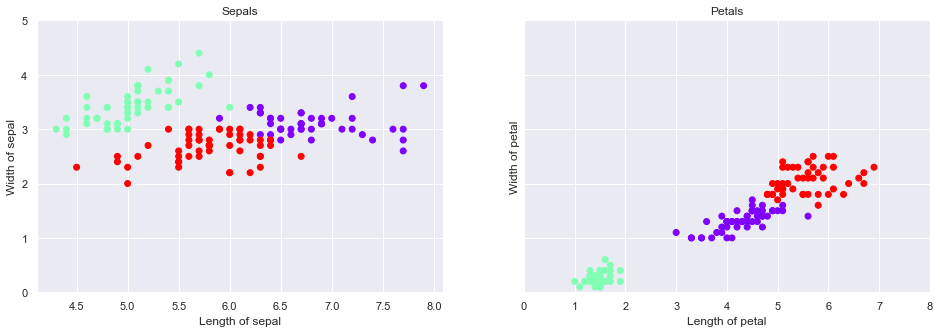

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(16,5))
ax1.scatter(clusters_3_s['sepal_length'], clusters_3_s['sepal_width'], c= clusters_3_s['cluster_pred'], cmap = 'rainbow')
ax1.set_title('Sepals')
ax1.set_xlabel('Length of sepal')
ax1.set_ylabel('Width of sepal')

ax2.scatter(clusters_3_p['petal_length'], clusters_3_p['petal_width'], c= clusters_3_p['cluster_pred'], cmap = 'rainbow')
ax2.set_title('Petals')
ax2.set_xlabel('Length of petal')
ax2.set_ylabel('Width of petal')

plt.xlim(0,8)
plt.ylim(0,5)

plt.show()

The best method to receive correct results is clustering the iris data set by shape of their petals with 3 clusters. However if we assume diffrently we would get 
complety diffrent results. In data science problems we usually don't know the correct number of clusters. We have to assume them before analysis. 
Clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution(based on Elbow method for example), but in real life, there are more (or less).